# **Linear regression**

# **Task 1: Stochastic Gradient Descent**

In [1]:
import numpy as np

np.random.seed(1234)

def create_toy_data(func, sample_size, std, domain=[0, 1]):
    x = np.linspace(domain[0], domain[1], sample_size)
    np.random.shuffle(x)
    y = func(x) + np.random.normal(scale=std, size=x.shape)
    return x, y

def sinusoidal(x):
    return np.sin(2 * np.pi * x)

x_train, y_train = create_toy_data(sinusoidal, 10, 0.25)
x_test = np.linspace(0, 1, 100)
y_test = sinusoidal(x_test)

In [2]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(10,)
(10,)
(100,)
(100,)


In [3]:
import torch
import matplotlib.pyplot as plt

In [4]:
x_train=torch.FloatTensor(x_train.reshape(-1,1))
y_train=torch.FloatTensor(y_train.reshape(-1,1))
x_test=torch.FloatTensor(x_test.reshape(-1,1))
y_test=torch.FloatTensor(y_test.reshape(-1,1))

In [5]:
def polynomial_features(x, degree=9):
    return torch.cat([x**i for i in range(1, degree+1)], dim=1)

In [6]:
x_train=polynomial_features(x_train, degree=9)
x_test=polynomial_features(x_test, degree=9)

In [7]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

torch.Size([10, 9])
torch.Size([10, 1])
torch.Size([100, 9])
torch.Size([100, 1])


In [8]:
class linearregression:
  def __init__(self, input_dim, lambdar, degree=9):
    self.W= torch.randn(input_dim, 1, requires_grad=True)
    self.b= torch.randn(1, requires_grad=True)
    self.lambdar= lambdar
    self.degree= degree

  def forward(self, x):
    y_pred= torch.matmul(x, self.W) + self.b
    return y_pred

  def loss(self, x, y ):
    y_pred= self.forward(x)
    mse_loss= torch.mean((y_pred-y)**2)
    l2= self.lambdar*torch.norm(self.W, 2)
    return mse_loss + l2

In [9]:
def stochastic_gradient_descent(model, x, y, alpha, epochs, batch_size):
  losses=[]
  for epoch in range(epochs):
    el=0
    for i in range(0, x.shape[0], batch_size):
      x_batch= x[i:i+batch_size]
      y_batch= y[i:i+batch_size]
      loss= model.loss(x_batch, y_batch)
      loss.backward()
      with torch.no_grad():
        model.W -= alpha * model.W.grad
        model.b -= alpha * model.b.grad
        model.W.grad.zero_()
        model.b.grad.zero_()
      el+= loss.item()
    loss_averaged= el/(len(x)//batch_size)
    losses.append(loss_averaged)
    if epoch % 100 == 0:
            print(f'epoch: {epoch}, loss: {loss_averaged:.4f}')
  return losses


In [10]:
alpha= 0.01
epochs= 5000
batch_size= 1
lambdar= 0.01

In [11]:
model= linearregression(input_dim=9, lambdar=lambdar)
losses_sgd= stochastic_gradient_descent(model, x_train, y_train, alpha, epochs, batch_size)

epoch: 0, loss: 3.8194
epoch: 100, loss: 0.2133
epoch: 200, loss: 0.2003
epoch: 300, loss: 0.1960
epoch: 400, loss: 0.1931
epoch: 500, loss: 0.1907
epoch: 600, loss: 0.1888
epoch: 700, loss: 0.1870
epoch: 800, loss: 0.1855
epoch: 900, loss: 0.1842
epoch: 1000, loss: 0.1831
epoch: 1100, loss: 0.1821
epoch: 1200, loss: 0.1811
epoch: 1300, loss: 0.1803
epoch: 1400, loss: 0.1796
epoch: 1500, loss: 0.1789
epoch: 1600, loss: 0.1783
epoch: 1700, loss: 0.1778
epoch: 1800, loss: 0.1773
epoch: 1900, loss: 0.1768
epoch: 2000, loss: 0.1764
epoch: 2100, loss: 0.1760
epoch: 2200, loss: 0.1756
epoch: 2300, loss: 0.1753
epoch: 2400, loss: 0.1750
epoch: 2500, loss: 0.1747
epoch: 2600, loss: 0.1744
epoch: 2700, loss: 0.1741
epoch: 2800, loss: 0.1739
epoch: 2900, loss: 0.1737
epoch: 3000, loss: 0.1734
epoch: 3100, loss: 0.1732
epoch: 3200, loss: 0.1730
epoch: 3300, loss: 0.1728
epoch: 3400, loss: 0.1726
epoch: 3500, loss: 0.1725
epoch: 3600, loss: 0.1723
epoch: 3700, loss: 0.1721
epoch: 3800, loss: 0.172

Text(0.5, 1.0, 'stochastic gradient descent')

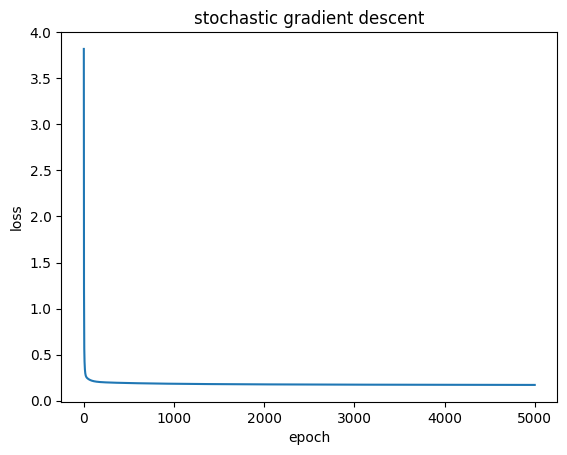

In [12]:
plt.plot(losses_sgd)
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("stochastic gradient descent")

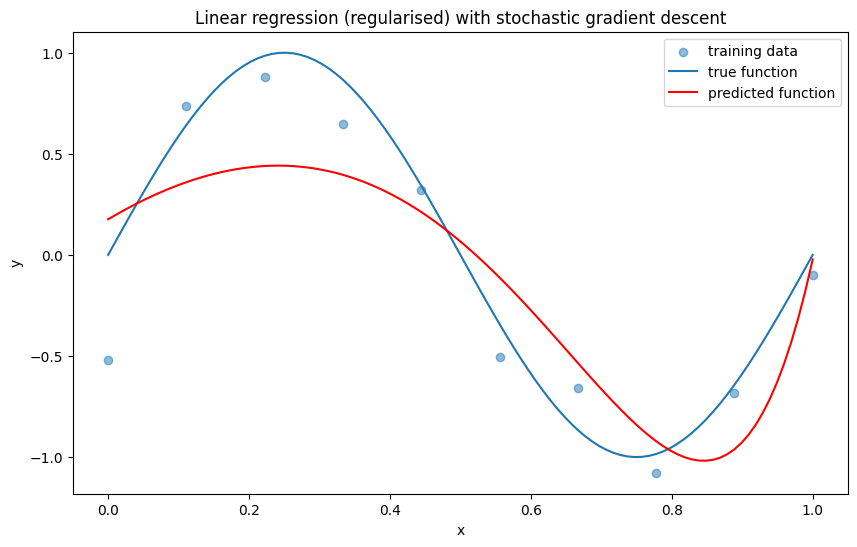

final weights:  [ 2.0562434  -3.3953085  -2.1884472  -0.87471235  0.4470286   0.62008536
  1.2814813   0.96290433  0.89215505]
final bias:  0.17613986134529114


In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(x_train[:, 0].numpy(), y_train.numpy(), label="training data", alpha=0.5)
x_plot = torch.linspace(0, 1, 100).reshape(-1, 1)
x_plot_poly = polynomial_features(x_plot)

with torch.no_grad():
    y_pred = model.forward(x_plot_poly)

plt.plot(x_plot, sinusoidal(x_plot), label="true function")
plt.plot(x_plot, y_pred, label="predicted function", color='r')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Linear regression (regularised) with stochastic gradient descent")
plt.show()



---


**Forward pass equation:**
$$y_p(x) = wx + b$$


---



**Loss function (MSE and L2 regularization):**
$$L(w,b) = \frac{1}{n}\sum_{i=1}^n (y_p(x_i) - y_i)^2 + \lambda w^2$$


---



**Loss gradient wrt weight:**
$$\frac{\partial L}{\partial w} = \frac{2}{n}\sum_{i=1}^n (y_p(x_i) - y_i)x_i + 2\lambda w$$


---



**Loss gradient wrt bias:**
$$\frac{\partial L}{\partial b} = \frac{2}{n}\sum_{i=1}^n (y_p(x_i) - y_i)$$


---



**Weight update:**
$$w = w - \alpha \frac{\partial L}{\partial w}$$


---



**Bias update:**
$$b = b - \alpha \frac{\partial L}{\partial b}$$


---



**Where:**
- $n$ is batch size
- $\lambda$ is regularization parameter
- $\alpha$ is learning rate

**Hyperparameters used:**
- Learning rate: 0.01
- Number of epochs: 2000
- Batch size: 1
- Regularization parameter (lambda): 0.01


# **Task 2: Momentum**

In [14]:
def momentum(model, x, y, alpha, momentum, epochs, batch_size, beta):
  losses=[]
  v_w= torch.zeros(model.W.shape)
  v_b= torch.zeros(model.b.shape)
  for epoch in range(epochs):
    el=0
    for i in range(0, x.shape[0], batch_size):
      x_batch= x[i:i+batch_size]
      y_batch= y[i:i+batch_size]
      loss= model.loss(x_batch, y_batch)
      loss.backward()
      with torch.no_grad():
        v_w= momentum*v_w + alpha*model.W.grad
        v_b= momentum*v_b + alpha*model.b.grad
        model.W -= v_w
        model.b -= v_b
        model.W.grad.zero_()
        model.b.grad.zero_()
      el+= loss.item()
    loss_averaged= el/(len(x)//batch_size)
    losses.append(loss_averaged)
    if epoch % 100 == 0:
      print('epoch: ', epoch, '\t loss: ', loss_averaged)
  return losses


In [15]:
moment= 0.9

In [16]:
model_momentum= linearregression(input_dim=9, lambdar=lambdar)
losses_momentum= momentum(model_momentum, x_train, y_train, alpha, moment, epochs, batch_size, lambdar)

epoch:  0 	 loss:  0.7653046444058418
epoch:  100 	 loss:  0.19999513030052185
epoch:  200 	 loss:  0.18338563591241835
epoch:  300 	 loss:  0.17773661576211452
epoch:  400 	 loss:  0.17483861297369002
epoch:  500 	 loss:  0.17302654460072517
epoch:  600 	 loss:  0.1717913154512644
epoch:  700 	 loss:  0.1709108766168356
epoch:  800 	 loss:  0.1702649064362049
epoch:  900 	 loss:  0.1697804845869541
epoch:  1000 	 loss:  0.16941090896725655
epoch:  1100 	 loss:  0.16912474259734153
epoch:  1200 	 loss:  0.16890064999461174
epoch:  1300 	 loss:  0.16872322112321853
epoch:  1400 	 loss:  0.16858162358403206
epoch:  1500 	 loss:  0.1684676840901375
epoch:  1600 	 loss:  0.16837534606456755
epoch:  1700 	 loss:  0.1683000899851322
epoch:  1800 	 loss:  0.16823841631412506
epoch:  1900 	 loss:  0.1681876353919506
epoch:  2000 	 loss:  0.16814560443162918
epoch:  2100 	 loss:  0.16811061799526214
epoch:  2200 	 loss:  0.1680814504623413
epoch:  2300 	 loss:  0.16805702894926072
epoch:  2400 

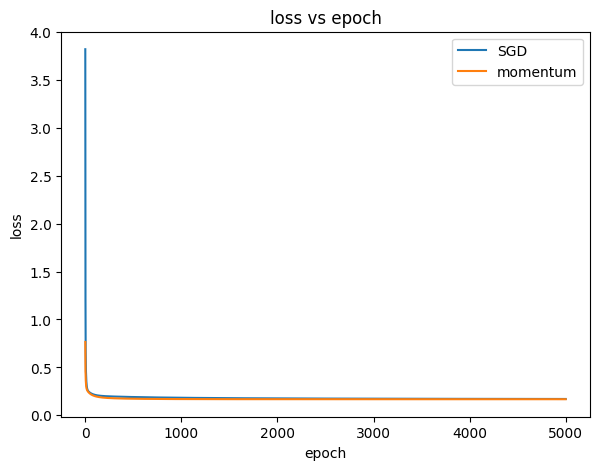

In [17]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(losses_sgd, label='SGD')
plt.plot(losses_momentum, label='momentum')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('loss vs epoch')
plt.legend()

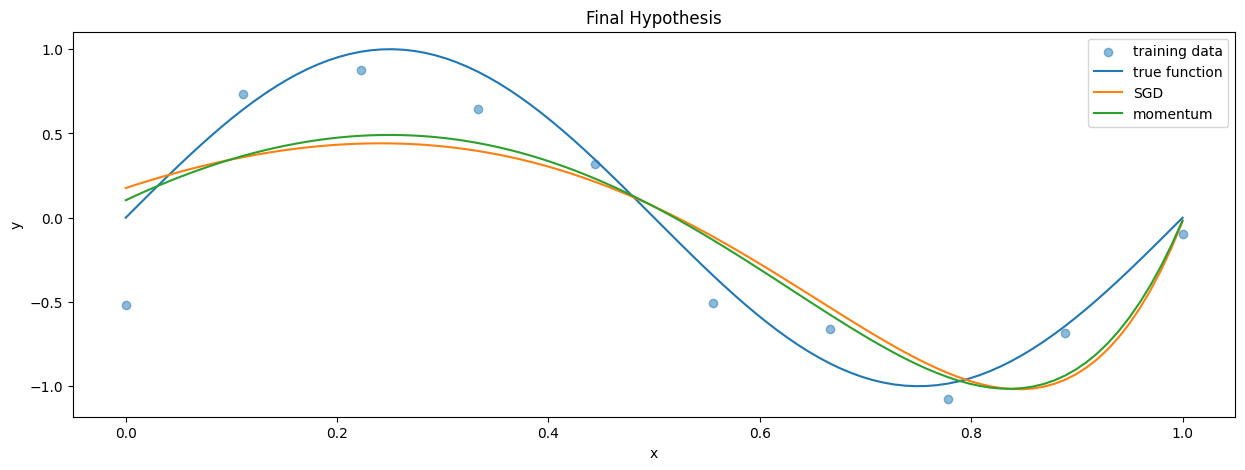

In [18]:
plt.figure(figsize=(15, 5))
plt.scatter(x_train[:, 0].numpy(), y_train.numpy(), label='training data', alpha=0.5)
x_plot = torch.linspace(0, 1, 100).reshape(-1, 1)
x_plot_poly = polynomial_features(x_plot)

with torch.no_grad():
    y_pred_sgd = model.forward(x_plot_poly).numpy()
    y_pred_momentum = model_momentum.forward(x_plot_poly).numpy()

plt.plot(x_plot, sinusoidal(x_plot), label='true function')
plt.plot(x_plot, y_pred_sgd, label='SGD')
plt.plot(x_plot, y_pred_momentum, label='momentum')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Final Hypothesis')
plt.legend()


**Hyperparameters used:**

Learning rate: 0.01

Number of epochs: 5000

Batch size: 1

Regularization parameter (lambda): 0.01

Momentum value: 0.9

# **Logistic regression**

# **Task 1 Data preprocessing:**

I utilized Google Colab to implement stochastic gradient descent and preprocess data for logistic regression. The program runs using a Kaggle API key, which should be uploaded when prompted.

In [19]:
from google.colab import files
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c avazu-ctr-prediction
!unzip avazu-ctr-prediction.zip

Saving kaggle.json to kaggle.json
 99% 1.18G/1.19G [00:15<00:00, 69.9MB/s]
100% 1.19G/1.19G [00:15<00:00, 83.0MB/s]
Archive:  avazu-ctr-prediction.zip
  inflating: sampleSubmission.gz     
  inflating: test.gz                 
  inflating: train.gz                


In [20]:
!gunzip train.gz
!gunzip test.gz

In [21]:
!mv train train.csv
!mv test test.csv

In [22]:
import pandas as pd
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [23]:
df_train = pd.read_csv('train.csv', nrows=100000)
df_test = pd.read_csv('test.csv', nrows=25000)

In [24]:
df_train.head(-1)

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,1.000009e+18,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,2,15706,320,50,1722,0,35,-1,79
1,1.000017e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
2,1.000037e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
3,1.000064e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15706,320,50,1722,0,35,100084,79
4,1.000068e+19,0,14102100,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,...,1,0,18993,320,50,2161,0,35,-1,157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,7.336555e+18,0,14102100,1005,0,543a539e,c7ca3108,3e814130,ecad2386,7801e8d9,...,1,0,20366,320,50,2333,0,39,-1,157
99995,7.336716e+18,0,14102100,1005,0,85f751fd,c4e18dd6,50e219e0,5e3f096f,2347f47a,...,1,0,21611,320,50,2480,3,297,100111,61
99996,7.337102e+18,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15702,320,50,1722,0,35,-1,79
99997,7.337105e+18,1,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15702,320,50,1722,0,35,-1,79


In [25]:
df_train.isna().sum()

,0
id,0
click,0
hour,0
C1,0
banner_pos,0
site_id,0
site_domain,0
site_category,0
app_id,0
app_domain,0


In [26]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                100000 non-null  float64
 1   click             100000 non-null  int64  
 2   hour              100000 non-null  int64  
 3   C1                100000 non-null  int64  
 4   banner_pos        100000 non-null  int64  
 5   site_id           100000 non-null  object 
 6   site_domain       100000 non-null  object 
 7   site_category     100000 non-null  object 
 8   app_id            100000 non-null  object 
 9   app_domain        100000 non-null  object 
 10  app_category      100000 non-null  object 
 11  device_id         100000 non-null  object 
 12  device_ip         100000 non-null  object 
 13  device_model      100000 non-null  object 
 14  device_type       100000 non-null  int64  
 15  device_conn_type  100000 non-null  int64  
 16  C14               100

In [27]:
df_train.shape

(100000, 24)

In [28]:
df_test

,id,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,10000174058809263569,14103100,1005,0,235ba823,f6ebf28e,f028772b,ecad2386,7801e8d9,07d7df22,...,1,0,8330,320,50,761,3,175,100075,23
1,10000182526920855428,14103100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,1,0,22676,320,50,2616,0,35,100083,51
2,10000554139829213984,14103100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,1,0,22676,320,50,2616,0,35,100083,51
3,10001094637809798845,14103100,1005,0,85f751fd,c4e18dd6,50e219e0,51cedd4e,aefc06bd,0f2161f8,...,1,0,18648,320,50,1092,3,809,100156,61
4,10001377041558670745,14103100,1005,0,85f751fd,c4e18dd6,50e219e0,9c13b419,2347f47a,f95efa07,...,1,0,23160,320,50,2667,0,47,-1,221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,14517144998719891863,14103100,1005,0,85f751fd,c4e18dd6,50e219e0,9c13b419,2347f47a,f95efa07,...,1,0,23161,320,50,2667,0,47,-1,221
24996,14517274934820400544,14103100,1005,0,85f751fd,c4e18dd6,50e219e0,54c5d545,2347f47a,0f2161f8,...,1,0,22819,320,50,2648,3,39,100148,23
24997,14517632218745653259,14103100,1005,0,85f751fd,c4e18dd6,50e219e0,9c13b419,2347f47a,f95efa07,...,1,0,23160,320,50,2667,0,47,100065,221
24998,14517682996432804195,14103100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,1,0,22261,320,50,2545,0,431,-1,221


In [29]:
df_test.isna().sum()

,0
id,0
hour,0
C1,0
banner_pos,0
site_id,0
site_domain,0
site_category,0
app_id,0
app_domain,0
app_category,0


In [30]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                25000 non-null  uint64
 1   hour              25000 non-null  int64 
 2   C1                25000 non-null  int64 
 3   banner_pos        25000 non-null  int64 
 4   site_id           25000 non-null  object
 5   site_domain       25000 non-null  object
 6   site_category     25000 non-null  object
 7   app_id            25000 non-null  object
 8   app_domain        25000 non-null  object
 9   app_category      25000 non-null  object
 10  device_id         25000 non-null  object
 11  device_ip         25000 non-null  object
 12  device_model      25000 non-null  object
 13  device_type       25000 non-null  int64 
 14  device_conn_type  25000 non-null  int64 
 15  C14               25000 non-null  int64 
 16  C15               25000 non-null  int64 
 17  C16         

In [31]:
df_test.shape

(25000, 23)

In [32]:
#preprocessing the hour column
for df in [df_train, df_test]:
    df.drop(['id'], axis=1, inplace=True)
    df['hour'] = pd.to_datetime(df['hour'], format='%y%m%d%H').dt.hour

In [33]:
df_train.dropna(inplace=True)
df_test.dropna(inplace=True)

In [34]:
df_train.head()

,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,0,0,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,1,2,15706,320,50,1722,0,35,-1,79
1,0,0,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,1,0,15704,320,50,1722,0,35,100084,79
2,0,0,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,1,0,15704,320,50,1722,0,35,100084,79
3,0,0,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,1,0,15706,320,50,1722,0,35,100084,79
4,0,0,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,07d7df22,...,1,0,18993,320,50,2161,0,35,-1,157


In [35]:
df_test.head()

,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,0,1005,0,235ba823,f6ebf28e,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,...,1,0,8330,320,50,761,3,175,100075,23
1,0,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,...,1,0,22676,320,50,2616,0,35,100083,51
2,0,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,...,1,0,22676,320,50,2616,0,35,100083,51
3,0,1005,0,85f751fd,c4e18dd6,50e219e0,51cedd4e,aefc06bd,0f2161f8,a99f214a,...,1,0,18648,320,50,1092,3,809,100156,61
4,0,1005,0,85f751fd,c4e18dd6,50e219e0,9c13b419,2347f47a,f95efa07,a99f214a,...,1,0,23160,320,50,2667,0,47,-1,221


In [36]:
categoricals= ['C1', 'banner_pos', 'site_category', 'app_category', 'device_type', 'device_conn_type']
numbers= ['hour']

In [37]:
#one hot encoding of categorical columns
df_train = pd.get_dummies(df_train, columns=categoricals)
df_test = pd.get_dummies(df_test, columns=categoricals)

In [38]:
df_train.isna().sum()

,0
click,0
hour,0
site_id,0
site_domain,0
app_id,0
...,...
device_type_5,0
device_conn_type_0,0
device_conn_type_2,0
device_conn_type_3,0


In [39]:
df_test.isna().sum()

,0
hour,0
site_id,0
site_domain,0
app_id,0
app_domain,0
...,...
device_type_5,0
device_conn_type_0,0
device_conn_type_2,0
device_conn_type_3,0


In [40]:
df_train

,click,hour,site_id,site_domain,app_id,app_domain,device_id,device_ip,device_model,C14,...,app_category_f95efa07,app_category_fc6fa53d,device_type_0,device_type_1,device_type_4,device_type_5,device_conn_type_0,device_conn_type_2,device_conn_type_3,device_conn_type_5
0,0,0,1fbe01fe,f3845767,ecad2386,7801e8d9,a99f214a,ddd2926e,44956a24,15706,...,False,False,False,True,False,False,False,True,False,False
1,0,0,1fbe01fe,f3845767,ecad2386,7801e8d9,a99f214a,96809ac8,711ee120,15704,...,False,False,False,True,False,False,True,False,False,False
2,0,0,1fbe01fe,f3845767,ecad2386,7801e8d9,a99f214a,b3cf8def,8a4875bd,15704,...,False,False,False,True,False,False,True,False,False,False
3,0,0,1fbe01fe,f3845767,ecad2386,7801e8d9,a99f214a,e8275b8f,6332421a,15706,...,False,False,False,True,False,False,True,False,False,False
4,0,0,fe8cc448,9166c161,ecad2386,7801e8d9,a99f214a,9644d0bf,779d90c2,18993,...,False,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0,0,85f751fd,c4e18dd6,5e3f096f,2347f47a,a99f214a,7fa0b614,be74e6fe,21611,...,False,False,False,True,False,False,True,False,False,False
99996,0,0,1fbe01fe,f3845767,ecad2386,7801e8d9,a99f214a,b789b7fa,711ee120,15702,...,False,False,False,True,False,False,True,False,False,False
99997,1,0,1fbe01fe,f3845767,ecad2386,7801e8d9,a99f214a,85cd2524,293291c1,15702,...,False,False,False,True,False,False,True,False,False,False
99998,0,0,1fbe01fe,f3845767,ecad2386,7801e8d9,a99f214a,eee01b6c,8a4875bd,15708,...,False,False,False,True,False,False,True,False,False,False


In [41]:
df_test

,hour,site_id,site_domain,app_id,app_domain,device_id,device_ip,device_model,C14,C15,...,app_category_f95efa07,app_category_fc6fa53d,device_type_0,device_type_1,device_type_4,device_type_5,device_conn_type_0,device_conn_type_2,device_conn_type_3,device_conn_type_5
0,0,235ba823,f6ebf28e,ecad2386,7801e8d9,a99f214a,69f45779,0eb711ec,8330,320,...,False,False,False,True,False,False,True,False,False,False
1,0,1fbe01fe,f3845767,ecad2386,7801e8d9,a99f214a,e8d44657,ecb851b2,22676,320,...,False,False,False,True,False,False,True,False,False,False
2,0,1fbe01fe,f3845767,ecad2386,7801e8d9,a99f214a,10fb085b,1f0bc64f,22676,320,...,False,False,False,True,False,False,True,False,False,False
3,0,85f751fd,c4e18dd6,51cedd4e,aefc06bd,a99f214a,422d257a,542422a7,18648,320,...,False,False,False,True,False,False,True,False,False,False
4,0,85f751fd,c4e18dd6,9c13b419,2347f47a,a99f214a,078c6b38,1f0bc64f,23160,320,...,True,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,0,85f751fd,c4e18dd6,9c13b419,2347f47a,a99f214a,c7526b3d,b65015e8,23161,320,...,True,False,False,True,False,False,True,False,False,False
24996,0,85f751fd,c4e18dd6,54c5d545,2347f47a,8fe17f6e,f9439d57,1f0bc64f,22819,320,...,False,False,False,True,False,False,True,False,False,False
24997,0,85f751fd,c4e18dd6,9c13b419,2347f47a,a99f214a,89fcd34b,a9fb0439,23160,320,...,True,False,False,True,False,False,True,False,False,False
24998,0,1fbe01fe,f3845767,ecad2386,7801e8d9,a99f214a,42b33cd9,d787e91b,22261,320,...,False,False,False,True,False,False,True,False,False,False


In [42]:
x_train=df_train.drop(['click'],axis=1)
y_train=df_train['click']


In [43]:
size=int(0.8*x_train.shape[0])
x_train, x_val= x_train[:size], x_train[size:]
y_train, y_val= y_train[:size], y_train[size:]

In [44]:
x_train.shape

(80000, 70)

In [45]:
#taking the common columns for faster processing
common_columns = set(x_train.columns).intersection(set(df_test.columns))
x_train = x_train[list(common_columns)]
df_test = df_test[list(common_columns)]

In [46]:
common_columns = set(x_train.columns).intersection(set(x_val.columns))
x_train = x_train[list(common_columns)]
x_val = x_val[list(common_columns)]

In [47]:
#normalizing
for col in numbers:
    mean = x_train[col].mean()
    std = x_train[col].std()
    x_train[col] = (x_train[col] - mean) / std
    df_test[col] = (df_test[col] - mean) / std
    x_val[col] = (x_val[col] - mean) / std

<ipython-input-47-ebdf75044361>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test[col] = (df_test[col] - mean) / std
<ipython-input-47-ebdf75044361>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_val[col] = (x_val[col] - mean) / std


In [48]:
x_train.shape

(80000, 58)

In [49]:
df_test.shape

(25000, 58)

In [50]:
x_train = x_train.apply(pd.to_numeric, errors='coerce')
x_train = x_train.fillna(0)
x_train = x_train.astype(float)

x_train= torch.FloatTensor(x_train.values)
y_train= torch.FloatTensor(y_train.values)



In [51]:
x_val = x_val.apply(pd.to_numeric, errors='coerce')
x_val = x_val.fillna(0)
x_val = x_val.astype(float)

x_val= torch.FloatTensor(x_val.values)
y_val= torch.FloatTensor(y_val.values)


In [52]:
x_val.shape

torch.Size([20000, 58])

In [53]:
x_test = df_test.apply(pd.to_numeric, errors='coerce')
x_test = x_test.fillna(0)
x_test = x_test.astype(float)
x_test = torch.FloatTensor(x_test.values)

In [54]:
print(x_train.shape)
print(y_train.shape)

torch.Size([80000, 58])
torch.Size([80000])


In [55]:
print(x_test.shape)

torch.Size([25000, 58])


# **Task 2: Logistic regression**

In [56]:
class logisticregression(nn.Module):
    def __init__(self, input_dim):
        super(logisticregression, self).__init__()
        self.linear = nn.Linear(input_dim, 1)
        nn.init.xavier_uniform_(self.linear.weight) #weight initialization using xavier glorot method
        nn.init.zeros_(self.linear.bias)  #bias initialization

    def forward(self, x):
        logits = self.linear(x)
        y_pred = torch.sigmoid(logits)
        return y_pred.clamp(min=1e-7, max=1-1e-7)

In [68]:
def sgd(x, y, model, alpha, epochs, batch_size):
    losses = []
    criterion = nn.BCELoss()
    optimizer = optim.SGD(model.parameters(), lr=alpha)
    for epoch in range(epochs):
        el = 0
        for i in range(0, x.shape[0], batch_size):
            x_batch = x[i:i+batch_size]
            y_batch = y[i:i+batch_size]
            optimizer.zero_grad()
            y_pred = model(x_batch)
            loss = criterion(y_pred, y_batch.unsqueeze(1))
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1)
            optimizer.step()
            el += loss.item()
        avg_loss = el / (len(x) // batch_size)
        losses.append(avg_loss)
        if epoch % 100 == 0:
            print('epoch: ', epoch, '\t loss: ', avg_loss)
    return losses

In [69]:
def binarize_data(x, threshold=0.5):
    return torch.where(x >= threshold, torch.ones_like(x), torch.zeros_like(x))

In [70]:
x_train = binarize_data(x_train)
x_val = binarize_data(x_val)
x_test = binarize_data(x_test)

In [71]:
x_train.shape

torch.Size([80000, 58])

In [72]:
#Using batch size 32 as the time taken to train the model using batch size 32 was 1 hour.
#Tried to take batch size 1 and train the model, it took 3 hours to run just the first 100 epochs.
model_logistic= logisticregression(input_dim=x_train.shape[1])
alpha= 0.001
epochs= 1000
batch_size= 32
losses_logistic= sgd(x_train, y_train, model_logistic, alpha, epochs, batch_size)


epoch:  0 	 loss:  0.48332798426151274
epoch:  100 	 loss:  0.44279312870502474
epoch:  200 	 loss:  0.4420063960194588
epoch:  300 	 loss:  0.44165893020033836
epoch:  400 	 loss:  0.441469841837883
epoch:  500 	 loss:  0.4413514142751694
epoch:  600 	 loss:  0.44126941630244254
epoch:  700 	 loss:  0.44120844556093214
epoch:  800 	 loss:  0.4411608441412449
epoch:  900 	 loss:  0.44112230873703956


Text(0.5, 1.0, 'training Loss')

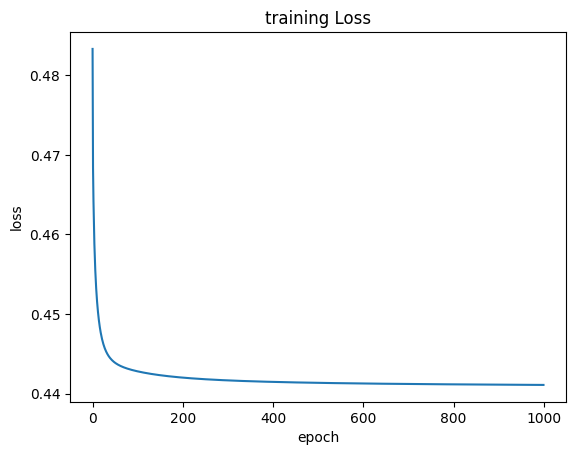

In [73]:
plt.plot(losses_logistic)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('training Loss')

In [74]:
model_logistic.eval()
with torch.no_grad():
  y_pred= model_logistic(x_val)
  print(y_pred)

tensor([[0.1332],
        [0.1871],
        [0.3194],
        ...,
        [0.2014],
        [0.2014],
        [0.2587]])


In [75]:
model_logistic.eval()
with torch.no_grad():
  y_pred1= model_logistic(x_test)
  print(y_pred1)

tensor([[0.2668],
        [0.1871],
        [0.1871],
        ...,
        [0.0971],
        [0.2014],
        [0.2014]])


In [76]:
y_test = torch.tensor(y_test).float()


<ipython-input-76-b4df7eb948d6>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_test = torch.tensor(y_test).float()


In [77]:
def pr_curve(y_true, y_scores):
    thresholds = torch.linspace(0, 1, 100)
    precisions, recalls = [], []
    for threshold in thresholds:
        y_pred = (y_scores >= threshold).int()
        tp = torch.sum((y_true == 1) & (y_pred == 1)).float()
        fp = torch.sum((y_true == 0) & (y_pred == 1)).float()
        fn = torch.sum((y_true == 1) & (y_pred == 0)).float()
        precision = tp / (tp + fp) if (tp + fp) > 0 else torch.tensor(1.0)
        recall = tp / (tp + fn) if (tp + fn) > 0 else torch.tensor(0.0)
        precisions.append(precision.item())
        recalls.append(recall.item())
    return np.array(precisions), np.array(recalls)




In [78]:
precision, recall = pr_curve(y_val, y_pred.squeeze())


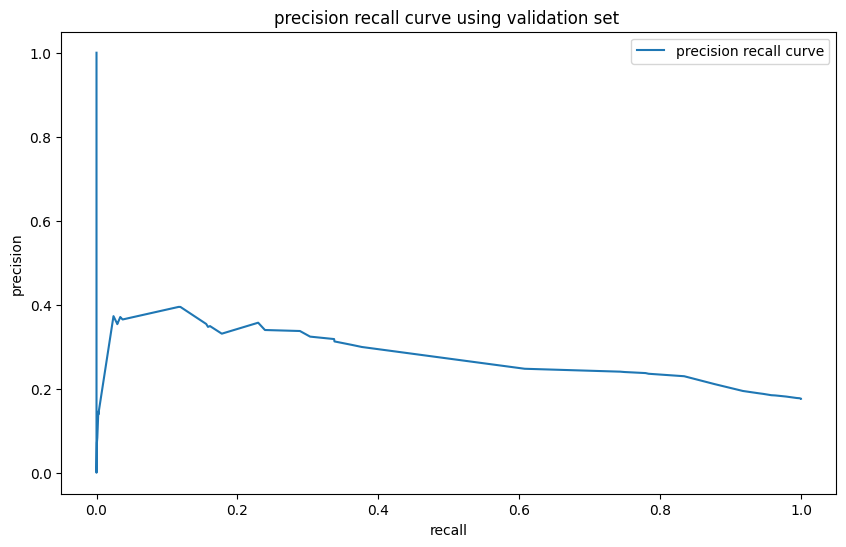

In [79]:
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, label='precision recall curve')
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('precision recall curve using validation set ')
plt.legend()

In [80]:
#checking using sklearn
from sklearn.metrics import precision_recall_curve

In [81]:
y_true = y_val.cpu().numpy()
y_scores = y_pred.squeeze().cpu().detach().numpy()


In [82]:
precision, recall, thresholds = precision_recall_curve(y_true, y_scores)

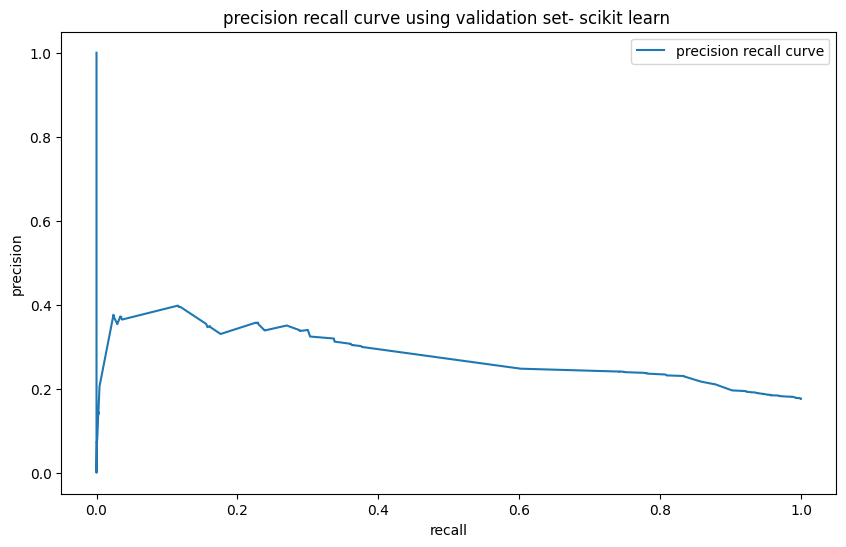

In [83]:
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, label='precision recall curve')
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('precision recall curve using validation set- scikit learn ')
plt.legend()

In [84]:
y_true = y_test.cpu().numpy()
y_scores = y_pred1.squeeze().cpu().detach().numpy()


In [85]:
y_true_binary = (y_true > 0.5).astype(float)
subset_size = min(len(y_true_binary), len(y_scores))
y_true_binary_subset = y_true_binary[:subset_size]
y_scores_subset = y_scores[:subset_size]


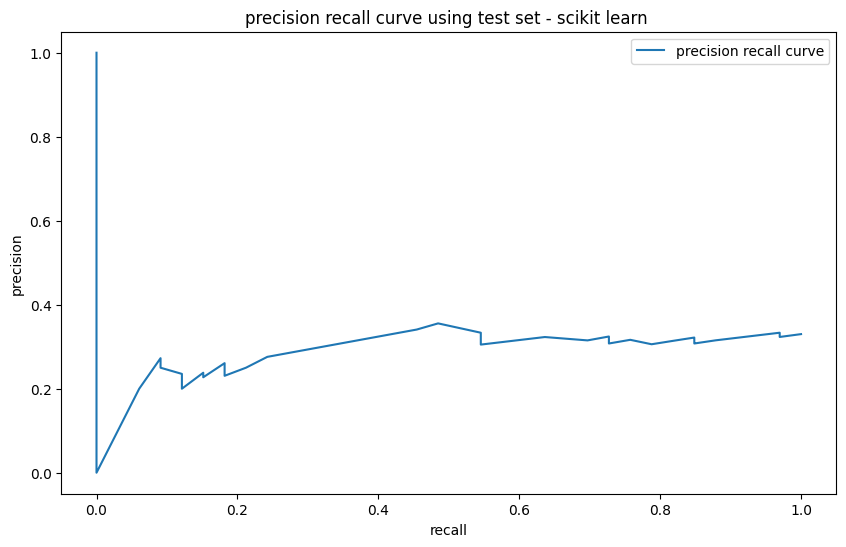

In [86]:
precision, recall, thresholds = precision_recall_curve(y_true_binary_subset, y_scores_subset)
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, label='precision recall curve')
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('precision recall curve using test set - scikit learn ')
plt.legend()


### Gradient Equations


$$\frac{\partial J}{\partial w} = \frac{1}{m} X^T (h_w(X) - y)$$
$$\frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (h_w(x^{(i)}) - y^{(i)})$$

Where:
- $J$ cost function
- $w$ weights
- $b$ bias
- $X$ input matrix
- $y$ true labels
- $h_w(X)$ is sigmoid function: $\frac{1}{1 + e^{-(Xw + b)}}$
- $m$ is no. of training examples


### Tradeoff Explanation

Precision and recall have an inverse relationship:

- **High precision, low recall**: The model is very selective, making few positive predictions but with high confidence. This is useful when false positives are costly.
- **Low precision, high recall**: The model captures many positive instances but also includes more false positives. This is preferable when false negatives are more problematic.
- As discussed in class the FP is increased the FN decreases. Hence the precision and recall are dependant on theses values.
- If we increase the precision the recall will decrease and vice versa.

### Hyperparameters used:
- alpha= 0.001
- epochs= 1000
- batch_size= 32
